# **_Identifying Outliers: Z-Score Method vs. Modified Z-Score Method_**

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

This Python Jupyter Notebook is my answer to a coding challenge from the **Data Normalization and Outliers** section of Mike X. Cohen's Statistics & Machine Learning course on Udemy.

-   Udemy course: https://www.udemy.com/course/statsml_x

-   Professor Cohen's website: https://www.mikexcohen.com/

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Goals:_**

-   Compare the regular z-score and the modified z-score in two situations:

    -   First for a normal distribution.

    -   Then for a non-normal distribution.

-   Which method is more effective in each situation?

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Intro:_**

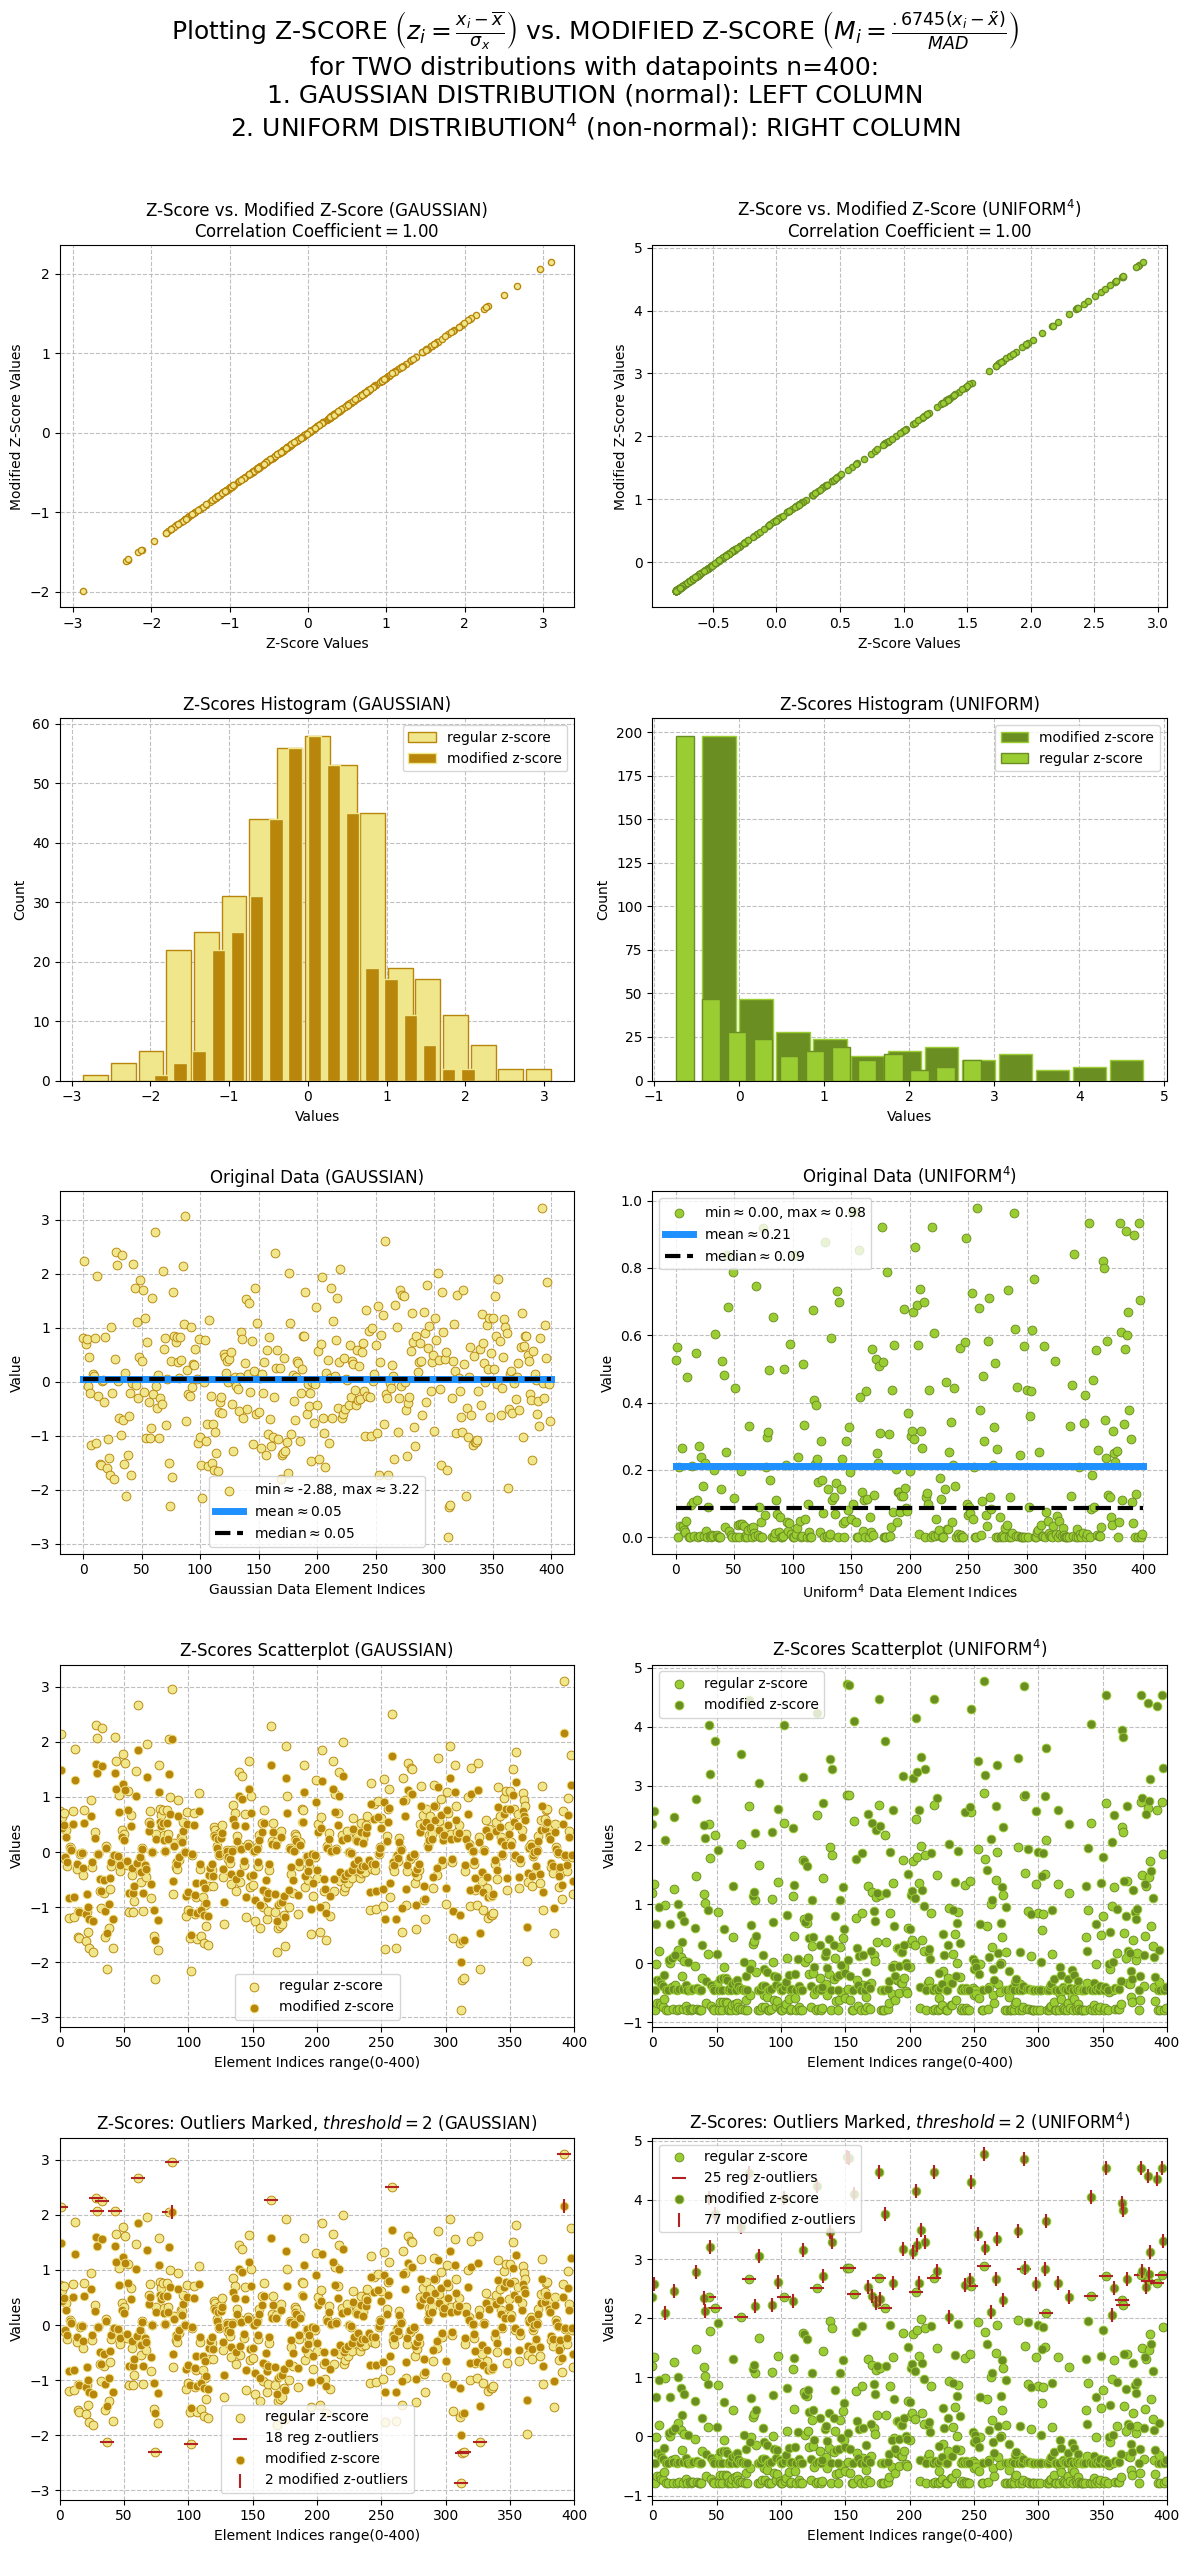

In [1]:
# Import libraries
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from statsmodels import robust

# How many?
N = 400

# Generate a normal dataset:
data_norm = np.random.randn(N)
data_norm_mean = np.mean(data_norm)
data_norm_z = (data_norm - data_norm_mean) / np.std(data_norm, ddof=1)
data_norm_med = np.median(data_norm)
data_norm_mad = robust.mad(data_norm)
data_norm_mod_z = stats.norm.ppf(0.75) * (data_norm - data_norm_med) / data_norm_mad
corr_coef_norm = np.corrcoef(data_norm_z, data_norm_mod_z)[0, 1]

# Generate uniform (non-normal) dataset:
non_exp = 4
data_uni = np.random.rand(N) ** non_exp
data_uni_mean = np.mean(data_uni)
data_uni_z = (data_uni - data_uni_mean) / np.std(data_uni, ddof=1)
data_uni_med = np.median(data_uni)
data_uni_mad = robust.mad(data_uni)
data_uni_mod_z = stats.norm.ppf(0.75) * (data_uni - data_uni_med) / data_uni_mad
corr_coef_uni = np.corrcoef(data_uni_z, data_uni_mod_z)[0, 1]

# Instantiate plot and subplot grid:
fig = plt.figure(figsize=(12, 26))
gs = GridSpec(5, 2, figure=fig)
axes = [
    fig.add_subplot(gs[0, 0]),
    fig.add_subplot(gs[0, 1]),
    fig.add_subplot(gs[1, 0]),
    fig.add_subplot(gs[1, 1]),
    fig.add_subplot(gs[2, 0]),
    fig.add_subplot(gs[2, 1]),
    fig.add_subplot(gs[3, 0]),
    fig.add_subplot(gs[3, 1]),
    fig.add_subplot(gs[4, 0]),
    fig.add_subplot(gs[4, 1]),
]

colors = {
    "normal-reg": "khaki",
    "normal-mod": "darkgoldenrod",
    "uniform-reg": "yellowgreen",
    "uniform-mod": "olivedrab",
}

# # # # # # # ## # # # # # #
# X/Y PLOT NORMAL Z-SCORES #
# # # # # # # ## # # # # # #
axes[0].plot(
    data_norm_z,
    data_norm_mod_z,
    ".",
    ms=9,
    markerfacecolor=colors["normal-reg"],
    markeredgecolor=colors["normal-mod"],
    markeredgewidth=0.95,
)

title_0 = "\nZ-Score vs. Modified Z-Score (GAUSSIAN)"
title_0 += f"\nCorrelation Coefficient$=${corr_coef_norm:.2f}"
axes[0].set_title(title_0)

axes[0].set_xlabel("Z-Score Values")
axes[0].set_ylabel("Modified Z-Score Values")

# # # # # # # # # # # # # # #
# X/Y PLOT UNIFORM Z-SCORES #
# # # # # # # # # # # # # # #
axes[1].plot(
    data_uni_z,
    data_uni_mod_z,
    ".",
    ms=9,
    markerfacecolor=colors["uniform-reg"],
    markeredgecolor=colors["uniform-mod"],
    markeredgewidth=0.95,
)
title_1 = f"\nZ-Score vs. Modified Z-Score (UNIFORM$^{non_exp}$)"
title_1 += f"\nCorrelation Coefficient$=${corr_coef_uni:.2f}"
axes[1].set_title(title_1)
axes[1].set_xlabel("Z-Score Values")
axes[1].set_ylabel("Modified Z-Score Values")

# # # # # ## # # # # #
# HISTOGRAM NORMAL Z #
# # # # # ## # # # # #
axes[2].hist(
    data_norm_z,
    bins="fd",
    rwidth=0.9,
    color=colors["normal-reg"],
    edgecolor=colors["normal-mod"],
    label="regular z-score",
)
axes[2].hist(
    data_norm_mod_z,
    bins="fd",
    rwidth=0.7,
    color=colors["normal-mod"],
    edgecolor=colors["normal-reg"],
    label="modified z-score",
)
title_2 = "\nZ-Scores Histogram (GAUSSIAN)"
axes[2].set_title(title_2)
axes[2].set_xlabel("Values")
axes[2].set_ylabel("Count")
axes[2].legend()

# # # # # # # # # # # # # # # #
# HISTOGRAM NORMAL MOD-Z-edge #
# # # # # # # # # # # # # # # #
axes[3].hist(
    data_uni_mod_z,
    bins="fd",
    rwidth=0.9,
    color=colors["uniform-mod"],
    edgecolor=colors["uniform-reg"],
    label="modified z-score",
)
axes[3].hist(
    data_uni_z,
    bins="fd",
    rwidth=0.7,
    color=colors["uniform-reg"],
    edgecolor=colors["uniform-mod"],
    label="regular z-score",
)
title_3 = "\nZ-Scores Histogram (UNIFORM)"
axes[3].set_title(title_3)
axes[3].set_xlabel("Values")
axes[3].set_ylabel("Count")
axes[3].legend()


# # # # # ## # # # # #
# SCATTERPLOT NORMAL #
# # # # # ## # # # # #
axes[4].scatter(
    x=np.arange(N),
    y=data_norm,
    s=40,
    color=colors["normal-reg"],
    edgecolor=colors["normal-mod"],
    linewidths=0.65,
    label=f"min$\\approx${round(min(data_norm), 2):.2f}, max$\\approx${round(max(data_norm), 2):.2f}",
)
axes[4].plot(
    [0, N],
    [data_norm_mean, data_norm_mean],
    "-",
    color="dodgerblue",
    lw=5,
    label=f"mean$\\approx${round(data_norm_mean, 2):.2f}",
)
axes[4].plot(
    [0, N],
    [data_norm_med, data_norm_med],
    "--",
    color="black",
    lw=3,
    label=f"median$\\approx${round(data_norm_med, 2):.2f}",
)
title_4 = "\nOriginal Data (GAUSSIAN)"
axes[4].set_title(title_4)
axes[4].set_xlabel("Gaussian Data Element Indices")
axes[4].set_ylabel("Value")
axes[4].legend()

# # # # # # # # # # # #
# SCATTERPLOT UNIFORM #
# # # # # # # # # # # #
axes[5].scatter(
    x=np.arange(N),
    y=data_uni,
    s=40,
    color=colors["uniform-reg"],
    edgecolor=colors["uniform-mod"],
    linewidths=0.65,
    label=f"min$\\approx${round(min(data_uni), 2):.2f}, max$\\approx${round(max(data_uni), 2):.2f}",
)
axes[5].plot(
    [0, N],
    [data_uni_mean, data_uni_mean],
    "-",
    color="dodgerblue",
    lw=5,
    label=f"mean$\\approx${round(data_uni_mean, 2):.2f}",
)
axes[5].plot(
    [0, N],
    [data_uni_med, data_uni_med],
    "--",
    color="black",
    lw=3,
    label=f"median$\\approx${round(data_uni_med, 2):.2f}",
)
title_5 = f"\nOriginal Data (UNIFORM$^{non_exp}$)"
axes[5].set_title(title_5)
axes[5].set_xlabel("Uniform$^4$ Data Element Indices")
axes[5].set_ylabel("Value")
axes[5].legend()

# # # # # #  # # # # # #
# SCATTERPLOT NORMAL Z #
# # # # # #  # # # # # #
axes[6].scatter(
    x=np.arange(N),
    y=data_norm_z,
    color=colors["normal-reg"],
    s=40,
    linewidths=0.65,
    edgecolor=colors["normal-mod"],
)
axes[6].scatter(
    x=np.arange(N),
    y=data_norm_mod_z,
    color=colors["normal-mod"],
    s=40,
    linewidths=0.65,
    edgecolor=colors["normal-reg"],
)
axes[6].set_xlim(0, 400)
axes[6].set_title("\nZ-Scores Scatterplot (GAUSSIAN)")
axes[6].set_xlabel(f"Element Indices range({0}-{N})")
axes[6].set_ylabel("Values")
axes[6].legend(["regular z-score", "modified z-score"])

# # # # # # # # # # # # #
# SCATTERPLOT UNIFORM Z #
# # # # # # # # # # # # #
axes[7].scatter(
    x=np.arange(N),
    y=data_uni_z,
    color=colors["uniform-reg"],
    s=40,
    linewidths=0.65,
    edgecolor=colors["uniform-mod"],
)
axes[7].scatter(
    x=np.arange(N),
    y=data_uni_mod_z,
    color=colors["uniform-mod"],
    s=40,
    linewidths=0.65,
    edgecolor=colors["uniform-reg"],
)
axes[7].set_xlim(0, 400)
axes[7].set_title(f"\nZ-Scores Scatterplot (UNIFORM$^{non_exp}$)")
axes[7].set_xlabel(f"Element Indices range({0}-{N})")
axes[7].set_ylabel("Values")
axes[7].legend(["regular z-score", "modified z-score"])

# # # # # # # # # # # # # # # # # # # #
# SCATTERPLOT NORMAL Z MINUS OUTLIERS #
# # # # # # # # # # # # # # # # # # # #
threshold = 2
# Calculate and plot outliers normal:
outliers_norm_reg_z = np.where(abs(data_norm_z) > threshold)
outliers_norm_mod_z = np.where(abs(data_norm_mod_z) > threshold)
axes[8].scatter(
    x=np.arange(N),
    y=data_norm_z,
    color=colors["normal-reg"],
    s=40,
    linewidths=0.65,
    edgecolor=colors["normal-mod"],
    label="regular z-score",
)
# Mark uniform reg-z outliers:
axes[8].scatter(
    x=outliers_norm_reg_z,
    y=data_norm_z[outliers_norm_reg_z],
    marker="_",
    color="firebrick",
    s=100,
    label=f"{len(outliers_norm_reg_z[0])} reg z-outliers",
)
# Re-plot uniform mod-z data:
axes[8].scatter(
    x=np.arange(N),
    y=data_norm_mod_z,
    color=colors["normal-mod"],
    s=40,
    linewidths=0.65,
    edgecolor=colors["normal-reg"],
    label="modified z-score",
)
# Mark uniform mod-z outliers:
axes[8].scatter(
    x=outliers_norm_mod_z,
    y=data_norm_mod_z[outliers_norm_mod_z],
    marker="|",
    color="firebrick",
    s=100,
    label=f"{len(outliers_norm_mod_z[0])} modified z-outliers",
)
axes[8].set_xlim(0, 400)
axes[8].set_title(f"\nZ-Scores: Outliers Marked, $threshold={threshold}$ (GAUSSIAN)")
axes[8].set_xlabel(f"Element Indices range({0}-{N})")
axes[8].set_ylabel("Values")
axes[8].legend()

# # # # # # # # # ## # # # # # # # # # #
# SCATTERPLOT UNIFORM Z MINUS OUTLIERS #
# # # # # # # # # ## # # # # # # # # # #
# Calculate outliers uniform:
outliers_uni_reg_z = np.where(abs(data_uni_z) > threshold)
outliers_uni_mod_z = np.where(abs(data_uni_mod_z) > threshold)
# Re-plot uniform reg-z data:
axes[9].scatter(
    x=np.arange(N),
    y=data_uni_z,
    color=colors["uniform-reg"],
    s=40,
    linewidths=0.65,
    edgecolor=colors["uniform-mod"],
    label="regular z-score",
)
# Mark uniform reg-z outliers:
axes[9].scatter(
    x=outliers_uni_reg_z,
    y=data_uni_z[outliers_uni_reg_z],
    marker="_",
    color="firebrick",
    s=100,
    label=f"{len(outliers_uni_reg_z[0])} reg z-outliers",
)
# Re-plot uniform mod-z data:
axes[9].scatter(
    x=np.arange(N),
    y=data_uni_mod_z,
    color=colors["uniform-mod"],
    s=40,
    linewidths=0.65,
    edgecolor=colors["uniform-reg"],
    label="modified z-score",
)
# Mark uniform mod-z outliers:
axes[9].scatter(
    x=outliers_uni_mod_z,
    y=data_uni_mod_z[outliers_uni_mod_z],
    marker="|",
    color="firebrick",
    s=100,
    label=f"{len(outliers_uni_mod_z[0])} modified z-outliers",
)
axes[9].set_xlim(0, 400)
axes[9].set_title(
    f"\nZ-Scores: Outliers Marked, $threshold={threshold}$ (UNIFORM$^{non_exp}$)"
)
axes[9].set_xlabel(f"Element Indices range({0}-{N})")
axes[9].set_ylabel("Values")
axes[9].legend()

# Put grid in background for all axes:
for ax in axes:
    ax.grid(True, color=(0.75, 0.75, 0.75), ls="--")
    ax.set_axisbelow(True)

# Build title:
sup_title = (
    "Plotting Z-SCORE $\\left(z_i = \\frac{x_i - \\overline{x}}{\\sigma_x}\\right)$"
)
sup_title += " vs. "
sup_title += (
    "MODIFIED Z-SCORE $\\left(M_i = \\frac{.6745 (x_i - \\tilde{x})}{MAD}\\right)$"
)
sup_title += f"\nfor TWO distributions with datapoints n={N}:"
sup_title += "\n1. GAUSSIAN DISTRIBUTION (normal): LEFT COLUMN"
sup_title += f"\n2. UNIFORM DISTRIBUTION$^{non_exp}$ (non-normal): RIGHT COLUMN\n\n"
# Show title:
plt.suptitle(sup_title, size=18)

# Plot it:
plt.tight_layout()
plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Takeaways:_**

#### **_Normal Results:_**

-   Visual confirmation that the Z-Score Method identifies significant outliers.

    -   Leaving the **MEDIAN** out of the calculation and relying on the **MEAN** helps the regular z-score method to more accurately identify outliers.

-   Modified Z-Score identifies few outliers, seems to ignore/miss outliers we'd want to know about.

#### **_Non-Normal Results:_**

-   Findings are inverted: Modified Z-Score Method does a good job identifying outliers.

-   Z-Score finds some outliers but ignores many we'd want identified.

    -   The **MEDIAN** serves the modified z-score method well in the case of a non-normal distribution.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px #5EDC1F; width: 75%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px magenta; width: 65%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px gold; width: 55%;">

<font size=2>

_Andrew Blais, Boston, Massachusetts_

GitHub: https://github.com/andrewblais

Website/Python Web Development Portfolio: https://wateronchair.com/

</font>